In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import solid2 as solid
import time
from numba import jit

## Lattice

### Define a spherical quantum dot:

In [2]:
class InDot:
    def __init__(self,R):
        self.R = R
    
    def __call__(self, r):
        return np.linalg.norm(r) < self.R

In [3]:
a1 = np.array((0,1,1))
a2 = np.array((1,0,1))
a3 = np.array((1,1,0))
dlat = np.array([[0,0,0],[1,0,0]])
Ndot1 = 20
Ndot2 = 20
Ndot3 = 20
indot = InDot(5.1)
ddot = []
for n1 in range(-Ndot1//2,Ndot1//2):
    for n2 in range(-Ndot2//2,Ndot2//2):
        for n3 in range(-Ndot3//2,Ndot3//2):
            for alpha in range(len(dlat)):
                r = n1*a1+n2*a2+n3*a3+dlat[alpha]
                if indot(r):
                    ddot.append(r)
ddot = np.array(ddot)
Ndot = len(ddot)
Ndot

587

In [4]:
min_dist = 10.0
for d1 in ddot:
    for d2 in ddot:
        dist = np.linalg.norm(d1-d2)
        if 0 < dist < min_dist:
            min_dist = dist
min_dist

1.0

In [5]:
model = solid.sphere(0.0)
scale = 10  # Larger scale will use more facets. 
for d in ddot:
    if d.sum() % 2 == 0:
        c = (112/256,128/256,144/256)  # Pb color: blueish-grey
    else:
        c = (150/256,0,0)  # Selenium color: deep red
    model += solid.sphere(scale*0.5).\
        color(c).\
        translate(scale*d)
model.save_as_scad()

'/Users/mlawler/Code/qdotarrays/solid_out.scad'

### Define a square lattice of quantum dots

In [6]:
a_dot = 11.0
a1_dot = np.array((a_dot,0,0))
a2_dot = np.array((0,a_dot,0))
D = np.array(ddot)  ## makes a copy of ddot
Dtype = np.array([D[alpha].sum()%2 for alpha in range(len(D))])

In [7]:
min_dist = 10.0
for alpha in range(len(D)):
    for beta in range(len(D)):
        dist = np.linalg.norm(D[alpha] - a1_dot+D[beta])
        min_dist = min(dist,min_dist)
min_dist

1.0

In [8]:
count = 0
for d1 in D:
    for d2 in D:
        if 0.0 < np.linalg.norm(d2-d1) < 1.01:
            count += 1
print(count)

2988


In [9]:
@jit
def site2index(n1,n2,alpha,N1,N2):
    return n1+n2*N1+alpha*N1*N2
@jit
def index2site(i,N1,N2):
    n1 = i%N1
    n2 = (i//N1)%N2
    alpha = (i//(N1*N2))
    return (n1,n2,alpha)

In [10]:
N1 = 1
N2 = 1
model = solid.sphere(0.0)
scale = 10  # Larger scale will use more facets. 
for i in range(N1*N2*len(D)):
    n1,n2,alpha = index2site(i,N1,N2)
    r = n1*a1_dot+n2*a2_dot+D[alpha]
    
    if Dtype[alpha] == 0:
        c = (112/256,128/256,144/256)  # Pb color: blueish-grey
    else:
        c = (150/256,0,0)  # Selenium color: deep red
    model += solid.sphere(scale*0.5).\
        color(c).\
        translate(scale*r)
model.save_as_scad()

'/Users/mlawler/Code/qdotarrays/solid_out.scad'

In [11]:
@jit
def test_symmetry():
    rcm = np.array((0.0,0,0))
    for i in range(N1*N2*len(D)):
        n1,n2,alpha = index2site(i,N1,N2)
        r = n1*a1_dot+n2*a2_dot+D[alpha]
        rcm = (N1//2-0.5)*a1_dot + (N2//2-0.5)*a2_dot
        rp = np.array(((0.0,1,0),(-1,0,0),(0,0,1)))@(r-rcm) +rcm
        #print(r,rp)

        rp_in_r = False
        for j in range(N1*N2*len(D)):
            m1,m2,beta = index2site(j,N1,N2)
            if rp[0] == (m1*a1_dot+m2*a2_dot+D[beta])[0] and \
               rp[1] == (m1*a1_dot+m2*a2_dot+D[beta])[1] and \
               rp[2] == (m1*a1_dot+m2*a2_dot+D[beta])[2]:
                rp_in_r = True
        if rp_in_r == False:
            print((n1,n2,alpha), " is not symmetric!")
test_symmetry()

(0, 0, 0)  is not symmetric!
(0, 0, 1)  is not symmetric!
(0, 0, 2)  is not symmetric!
(0, 0, 3)  is not symmetric!
(0, 0, 4)  is not symmetric!
(0, 0, 5)  is not symmetric!
(0, 0, 6)  is not symmetric!
(0, 0, 7)  is not symmetric!
(0, 0, 8)  is not symmetric!
(0, 0, 9)  is not symmetric!
(0, 0, 10)  is not symmetric!
(0, 0, 11)  is not symmetric!
(0, 0, 12)  is not symmetric!
(0, 0, 13)  is not symmetric!
(0, 0, 14)  is not symmetric!
(0, 0, 15)  is not symmetric!
(0, 0, 16)  is not symmetric!
(0, 0, 17)  is not symmetric!
(0, 0, 18)  is not symmetric!
(0, 0, 19)  is not symmetric!
(0, 0, 20)  is not symmetric!
(0, 0, 21)  is not symmetric!
(0, 0, 22)  is not symmetric!
(0, 0, 23)  is not symmetric!
(0, 0, 24)  is not symmetric!
(0, 0, 25)  is not symmetric!
(0, 0, 26)  is not symmetric!
(0, 0, 27)  is not symmetric!
(0, 0, 28)  is not symmetric!
(0, 0, 29)  is not symmetric!
(0, 0, 30)  is not symmetric!
(0, 0, 31)  is not symmetric!
(0, 0, 32)  is not symmetric!
(0, 0, 33)  is not s

### Define a honeycomb lattice of quantum dots

In [12]:
a_dot = 1.5*4
a1_dot = a_dot*(np.array([1,-1,-1])-np.array([1,1,1])@np.array([1,-1,-1])*np.array([1,1,1])/3)
a2_dot = a_dot*(np.array([-1,1,-1])-np.array([1,1,1])@np.array([-1,1,-1])*np.array([1,1,1])/3)
a3_dot = a_dot*(np.array([-1,-1,1])-np.array([1,1,1])@np.array([-1,-1,1])*np.array([1,1,1])/3)
D = np.concatenate((np.array(ddot)+np.array([0,0,0]),
                    np.array(ddot)+(a2_dot-a3_dot)/3+np.array([5,5,5])))
Dtype = np.array([int(D[alpha].sum()%2) for alpha in range(len(D))])

In [13]:
min_dist = 10.0
for alpha in range(len(D)):
    for beta in range(len(D)):
        dist = np.linalg.norm(D[alpha] - a2_dot+D[beta])
        min_dist = min(dist,min_dist)
min_dist

0.0

In [14]:
N1 = 2
N2 = 2
model = solid.sphere(0.0)
scale = 1  # Larger scale will use more facets. 
for i in range(N1*N2*len(D)):
    n1,n2,alpha = index2site(i,N1,N2)
    r = n1*a1_dot+n2*a2_dot+D[alpha]
    
    if Dtype[alpha] == 0:
        c = (112/256,128/256,144/256)  # Pb color: blueish-grey
    else:
        c = (150/256,0,0)  # Selenium color: deep red
    model += solid.sphere(scale*0.5).\
        color(c).\
        translate(scale*r)
model.save_as_scad()

'/Users/mlawler/Code/qdotarrays/solid_out.scad'

## Electronic Structure

### Simple S-orbital model

In [15]:
N1 = 2
N2 = 2
Nd = len(D)
t = 1.0
dt = 0.0
S = sparse.dok_matrix((N1*N2*Nd, N1*N2*Nd))
start = time.time()
for i in range(N1*N2*Nd):
    n1,n2,alpha = index2site(i,N1,N2)
    for j in range(N1*N2*Nd):
        n1p,n2p,alphap = index2site(j,N1,N2)
        if np.linalg.norm(n1*a1_dot+n2*a2_dot+D[alpha] - n1p*a1_dot-n2p*a2_dot-D[alphap]) < 1.01:
            S[i, j] = -t + dt*np.random.rand()
print('Time taken to complete this task: ',time.time()-start)

Time taken to complete this task:  252.76594495773315


In [16]:
start = time.time()
lam,V = sparse.linalg.eigsh(S,k=40)
print(time.time()-start)
lam

5.363569974899292


array([-6.98591545, -6.98533968, -6.92787511, -6.9275726 , -6.85336663,
       -6.8533154 , -6.83110061, -6.83108562, -6.81780228, -6.81748862,
       -6.65296845, -6.65104065, -6.64751732, -6.64462737, -6.62398263,
       -6.62226248, -6.61370549, -6.60888683, -6.37755049, -6.37017181,
       -6.36545674, -6.36199505, -6.35983846, -6.35426673, -6.35307728,
       -6.35217392, -6.34955297, -6.34632646, -6.34628309, -6.34527447,
       -6.34385941, -6.3437993 , -6.30029407, -6.29442872, -6.29415161,
       -6.29184119, -6.28569794, -6.28509115, -6.2646852 , -6.2642657 ])

In [17]:
rxmax,rymax = 0.0,0.0
rxmin,rymin = 0.0,0.0
for i in range(N1*N2*Nd):
    n1,n2,alpha = index2site(i,N1,N2)
    r = n1*a1_dot+n2*a2_dot+D[alpha]
    if r[0] > rxmax:
        rxmax = r[0]
    if r[0] < rxmin:
        rxmin = r[0]
    if r[1] > rymax:
        rymax = r[1]
    if r[1] < rymin:
        rymin = r[1]
canvas = np.zeros((int(rxmax-rxmin)+1,int(rymax-rymin)+1))
for i in range(N1*N2*Nd):
    n1,n2,alpha = index2site(i,N1,N2)
    r = n1*a1_dot+n2*a2_dot+D[alpha]
    if r[2] == 0.0:
        #print(rxmin+r(0),rymin+r(1))
        canvas[int(r[0]-rxmin),int(r[1]-rymin)] = sum(abs(V[i,:])**2)

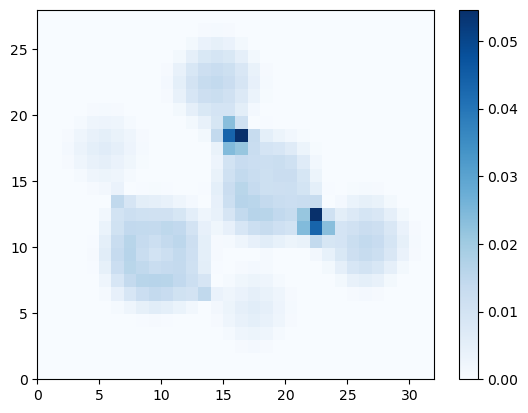

In [18]:
plt.pcolor(canvas,cmap='Blues')
plt.colorbar()

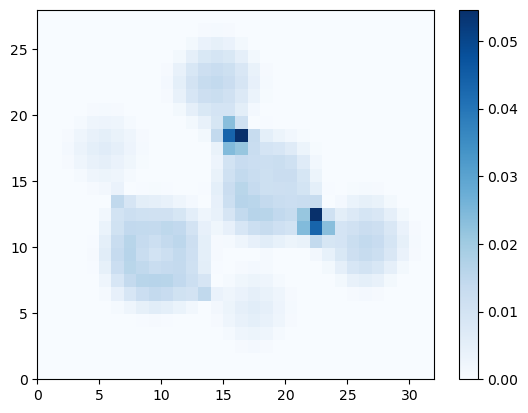

In [19]:
plt.pcolor(canvas,cmap='Blues')
plt.colorbar()

In [20]:
model = solid.sphere(0.0)
scale = 1  # Larger scale will use more facets. 
state = abs(V[:,0])/abs(V[:,0]).max()
for i in range(N1*N2*len(D)):
    n1,n2,alpha = index2site(i,N1,N2)
    r = n1*a1_dot+n2*a2_dot+D[alpha]
    if D[alpha].sum() % 2 == 0:
        c = (112/256,128/256,144/256)  # Pb color: blueish-grey
    else:
        c = (150/256,0,0)  # Selenium color: deep red
#    model += solid.sphere(scale*0.5).\
#        color(c,alpha=state(i)).\
#        translate(scale*r)
    model += solid.sphere(scale*0.5).\
        color(c).\
        translate(scale*r)
#model.save_as_scad()

In [21]:
def line3d(r1,r2,model,c,scale):
    dr = np.linalg.norm(r2-r1)
    zhat = np.array((0,0,1))
    rhat = (r2-r1)/np.linalg.norm(r2-r1)
    khat = np.cross(zhat,rhat)
    if abs(khat).sum()==0.0:
        khat = np.array((0,1,0))
    theta = np.arccos(zhat@rhat)
    model+= solid.cylinder(h=dr,r1=0.1*dr,r2=0.1*dr).\
        color(c).\
        rotate(a=180*theta/np.pi,v=khat).\
        translate(scale*r1)
    return model

In [22]:
model = solid.sphere(0.0)
model = line3d(np.array((0,0,0)),np.array((0,0,1)),model,np.array((0.5,0.5,0.5)),1)
model.save_as_scad()

'/Users/mlawler/Code/qdotarrays/solid_out.scad'

In [23]:
N1=2
N2=1
model = solid.sphere(0.0)
scale = 1  # Larger scale will use more facets. 
state = abs(V[:,0])/abs(V[:,0]).max()
for i in range(N1*N2*len(D)):
    n1,n2,alpha = index2site(i,N1,N2)
    r1 = n1*a1_dot+n2*a2_dot+D[alpha]
    if Dtype[alpha] == 0:
        c = (112/256,128/256,144/256)  # Pb color: blueish-grey
    else:
        c = (150/256,0,0)  # Selenium color: deep red
    model+=solid.sphere(scale*0.1).\
        color(c).\
        translate(scale*r1)
    for j in range(N1*N2*len(D)):
        if j != i and S[i,j] != 0.0:
            n1p,n2p,alphap = index2site(j,N1,N2)
            r1p = n1p*a1_dot+n2p*a2_dot+D[alphap]
            c = (112/256,128/256,144/256)  # Pb color: blueish-grey
            model = line3d(r1,r1p,model,c,scale)
model.save_as_scad()

'/Users/mlawler/Code/qdotarrays/solid_out.scad'

### s,p orbital model
I take this model from the nearest neighbor model of "Band gap anomaly and topological properties in lead chalcogenides" by Nie, Xu, Xu, Fang, Chinese Physics B 2016:

https://iopscience.iop.org/article/10.1088/1674-1056/25/3/037311/meta

In [24]:
N1 = 2
N2 = 1
Nd = len(D)
Norb = 4
S = sparse.dok_matrix((N1*N2*Nd*Norb, N1*N2*Nd*Norb),dtype=np.cfloat)

Let's treat the orbitals as first Nd values of alpha are s orbitals, next Nd values are px, next Nd values are py and last Nd values are pz. The onsite and nearest neighbor parameters are:

In [25]:
mu = 5.0
A1 = -2.0072
A2 = 0.0891
A3 = -0.0215 
A6 = 6.9910 
A7 = -0.0259 
A8 = -0.0283 
A9 = 0.3110 
C1 = -7.8493
C2 = -0.0848
C3 = 0.1689
C6 = 3.1139
C7 = 0.1686
C8 = -0.0188
C9 = 0.1356
B1 = -0.1537
B2 = 0.0974
B4 = 0.4891
B5 = 0.1050
E1 = -0.2215
E2 = -0.1308
E4 = 0.1409
E5 = 0.0330
D1 = -0.6076
D2 = 1.2714
D3 = -1.4507
D4 = 1.8474
D5 = -0.2950
F1 = 0.3100
F2 = -0.0491
F3 = -0.0069
F4 = 0.1013
F5 = 0.0425

Block Hamiltonian is then:

In [26]:
@jit
def hfull(kx,ky,kz):
    H11 = A1 +4*A2*(np.cos(kx)*np.cos(ky) +np.cos(ky)*np.cos(kz) +np.cos(kz)*np.cos(kx)) +2*B1*(np.cos(2*kx) +np.cos(2*ky) +np.cos(2*kz))
    H15 = 2*D1*(np.cos(kx) +np.cos(ky) +np.cos(kz)) +8*F1*np.cos(kx)*np.cos(ky)*np.cos(kz)
    H22 = A6 +4*A7*np.cos(kx)*(np.cos(ky) +np.cos(kz)) +4*A8*np.cos(ky)*np.cos(kz) +2*B4*np.cos(2*kx) +2*B5*(np.cos(2*ky) +np.cos(2*kz))
    H23 = -4*A9*np.sin(kx)*np.sin(ky)
    H24 = -4*A9*np.sin(kx)*np.sin(kz)
    H26 = 2*D4*np.cos(kx) +2*D5*(np.cos(ky) +np.cos(kz)) +8*F4*np.cos(kx)*np.cos(ky)*np.cos(kz)
    H27 = -8*F5*np.sin(kx)*np.sin(ky)*np.cos(kz)
    H28 = -8*F5*np.sin(kx)*np.sin(kz)*np.cos(ky)
    H33 = A6 +4*A7*np.cos(ky)*(np.cos(kz) +np.cos(kx)) +4*A8*np.cos(kz)*np.cos(kx) +2*B4*np.cos(2*ky) +2*B5*(np.cos(2*kz) +np.cos(2*kx))
    H34 = -4*A9*np.sin(ky)*np.sin(kz)
    H36 = H27
    H37 = 2*D4*np.cos(ky) +2*D5*(np.cos(kz) +np.cos(kx)) +8*F4*np.cos(kx)*np.cos(ky)*np.cos(kz)
    H38 = -8*F5*np.sin(ky)*np.sin(kz)*np.cos(kx)
    H44 = A6 +4*A7*np.cos(kz)*(np.cos(kx) +np.cos(ky)) +4*A8*np.cos(kx)*np.cos(ky) +2*B4*np.cos(2*kz) +2*B5*(np.cos(2*kx) +np.cos(2*ky))
    H46 = H28
    H47 = H38
    H48 = 2*D4*np.cos(kz) +2*D5*(np.cos(ky) +np.cos(kx)) +8*F4*np.cos(kx)*np.cos(ky)*np.cos(kz)
    H55 = C1 +4*C2*(np.cos(kx)*np.cos(ky) +np.cos(ky)*np.cos(kz) +np.cos(kz)*np.cos(kx)) +2*E1*(np.cos(2*kx) +np.cos(2*ky) +np.cos(2*kz))
    H66 = C6 +4*C7*np.cos(kx)*(np.cos(ky) +np.cos(kz)) +4*C8*np.cos(ky)*np.cos(kz) +2*E4*np.cos(2*kx) +2*E5*(np.cos(2*ky) +np.cos(2*kz))
    H67 = -4*C9*np.sin(kx)*np.sin(ky)
    H68 = -4*C9*np.sin(kx)*np.sin(kz)
    H77 = C6 +4*C7*np.cos(ky)*(np.cos(kz) +np.cos(kx)) +4*C8*np.cos(kz)*np.cos(kx) +2*E4*np.cos(2*ky) +2*E5*(np.cos(2*kz) +np.cos(2*kx))
    H78 = -4*C9*np.sin(ky)*np.sin(kz)
    H88 = C6 +4*C7*np.cos(kz)*(np.cos(kx) +np.cos(ky)) +4*C8*np.cos(kx)*np.cos(ky) +2*E4*np.cos(2*kz) +2*E5*(np.cos(2*kx) +np.cos(2*ky))

    G12 = -4j*A3*np.sin(kx)*(np.cos(ky) +np.cos(kz))-2*B2*np.sin(2*kx)
    G13 = -4j*A3*np.sin(ky)*(np.cos(kz) +np.cos(kx))-2*B2*np.sin(2*ky)
    G14 = -4j*A3*np.sin(kz)*(np.cos(kx) +np.cos(ky))-2*B2*np.sin(2*kz)
    G16 = 2j*D2*np.sin(kx) +8*F3*np.sin(kx)*np.cos(ky)*np.cos(kz)
    G17 = 2j*D2*np.sin(ky) +8*F3*np.sin(ky)*np.cos(kz)*np.cos(kx)
    G18 = 2j*D2*np.sin(kz) +8*F3*np.sin(kz)*np.cos(kx)*np.cos(ky)
    G25 = -2j*D3*np.sin(kx)-8*F2*np.sin(kx)*np.cos(ky)*np.cos(kz)
    G35 = -2j*D3*np.sin(ky)-8*F2*np.sin(ky)*np.cos(kz)*np.cos(kx)
    G45 = -2j*D3*np.sin(kz)-8*F2*np.sin(kz)*np.cos(kx)*np.cos(ky)
    G56 = -4j*C3*np.sin(kx)*(np.cos(ky) +np.cos(kz))-2*E2*np.sin(2*kx)
    G57 = -4j*C3*np.sin(ky)*(np.cos(kz) +np.cos(kx))-2*E2*np.sin(2*ky)
    G58 = -4j*C3*np.sin(kz)*(np.cos(kx) +np.cos(ky))-2*E2*np.sin(2*kz)
    return np.array([[H11, G12, G13, G14, H15, G16, G17, G18],
                    [-G12, H22, H23, H24, G25, H26, H27, H28],
                    [-G13, H23, H33, H34, G35, H36, H37, H38],
                    [-G14, H24, H34, H44, G45, H46, H47, H48],
                     [H15,-G25,-G35,-G45, H55, G56, G57, G58],
                    [-G16, H26, H36, H46,-G56, H66, H67, H68],
                    [-G17, H27, H37, H47,-G57, H67, H77, H78],
                    [-G18, H28, H38, H48,-G58, H68, H78, H88]]) - mu*np.eye(8)

In [27]:
np.linalg.eigvalsh(hfull(1,1,1))

array([-14.20673531,  -8.43268316,  -1.93503921,  -1.93503921,
        -1.23671998,   2.07083326,   2.82904791,   2.82904791])

In [28]:
b1 = np.pi*np.array([-1,1,1])
b2 = np.pi*np.array([1,-1,1])
b3 = np.pi*np.array([1,1,-1])

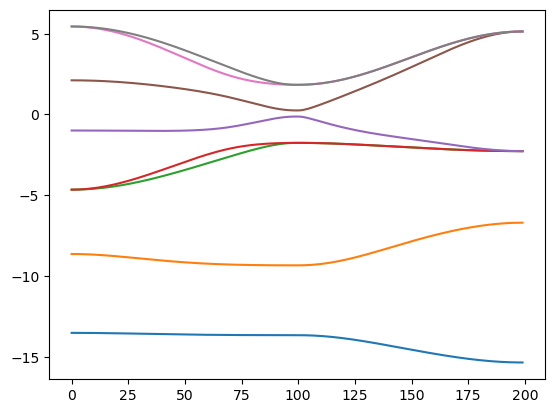

In [ ]:
import matplotlib.pyplot as plt
ks = np.linspace(0,1,100)
lams = np.zeros((200,8))
L = (b1+b2+b3)/2
W = (1/4)*b1+(3/4)*b2+(1/2)*b3
for i,k in enumerate(ks):
    kvec = W + k*(L-W)
    lams[i] = np.linalg.eigvalsh(hfull(kvec[0],kvec[1],kvec[2]))
for i,k in enumerate(ks):
    kvec = L+k*(-L)
    lams[i+100] = np.linalg.eigvalsh(hfull(kvec[0],kvec[1],kvec[2]))
plt.plot(lams);

In [ ]:
lam = np.linalg.eigvalsh(hfull(L[0],L[1],L[2]))-5
print('gap = ', lam[5]-lam[4])
lam

gap =  0.37862846318086874


array([-18.66583906, -14.3414106 ,  -6.7575    ,  -6.7575    ,
        -5.1282894 ,  -4.74966094,  -3.1632    ,  -3.1632    ])

In [ ]:
np.linalg.eigvalsh(hfull(0.0,0.0,0.0))-5

array([-20.35582044, -11.70027956,  -7.26982437,  -7.26982437,
        -7.26982437,   0.13992437,   0.13992437,   0.13992437])

In [ ]:
lam = np.linalg.eigvalsh(hfull(W[0],W[1],W[2]))-5
lam

array([-18.52201462, -13.63956029,  -9.65459816,  -9.65459816,
        -5.99213971,  -2.88508538,   0.44869816,   0.44869816])

In [ ]:
start = time.time()
@jit
def neighborlists(N1,N2,Nd,Norb):
    nnlist = np.zeros((50*N1*N2*Nd*Norb,2))
    nnnlist = np.zeros((50*N1*N2*Nd*Norb,2))
    nnnnlist = np.zeros((50*N1*N2*Nd*Norb,2))
    nn,nnn,nnnn=0,0,0
    for i in range(N1*N2*Nd*Norb):
        n1,n2,alpha = index2site(i,N1,N2)
        r = n1*a1_dot+n2*a2_dot+D[alpha%Nd]
        coupled = 0
        if i == 2378:
            print('i made it to 2378')
        for j in range(N1*N2*Nd*Norb):
            n1p,n2p,alphap = index2site(j,N1,N2)
            rp = n1p*a1_dot+n2p*a2_dot+D[alphap%Nd]
            if i == 2378 and j == 0:
                print('i made it to 2378 and j to 0')
                print('nn = ', nn, 'dr = ',r-rp, ' with len = ',np.linalg.norm(r-rp))
            if abs(np.linalg.norm(r-rp)- 1.0) < 0.1:
                if i==2378 and j == 0:
                    print('Suposedly found [2378,0]')
                nnlist[nn]=np.array([i,j])
                nn+=1
                coupled+=1
            elif abs(np.linalg.norm(r-rp) - np.sqrt(2)) < 0.1:
                nnnlist[nnn]=np.array([i,j])
                nnn+=1
                coupled+=1
            elif abs(np.linalg.norm(r-rp) - np.sqrt(3)) < 0.1:
                nnnnlist[nnnn]=np.array([i,j])
                nnnn+=1
                coupled+=1
            elif abs(np.linalg.norm(r-rp) - 2.0) < 0.1:
                nnnnlist[nnnn]=np.array([i,j])
                nnnn+=1
                coupled+=1
        if coupled==0:
            print('atom ', i, n1, n2, alpha%Nd, ' not coupled to anything!')
    nnlist = nnlist[:nn]
    nnnlist = nnnlist[:nnn]
    nnnnlist = nnnnlist[:nnnn]
    return nnlist,nnnlist,nnnnlist
nnlist,nnnlist,nnnnlist = neighborlists(N1,N2,Nd,Norb)
nnlist,nnnlist,nnnnlist = nnlist.astype(int),nnnlist.astype(int),nnnnlist.astype(int)
print('nn = ', len(nnlist), ', nnn = ', len(nnnlist), ', nnnn = ',len(nnnnlist))
print('Time taken to complete this task: ',time.time()-start)

i made it to 2378
i made it to 2378 and j to 0
nn =  48780 dr =  [-1.  0.  0.]  with len =  1.0
Suposedly found [2378,0]
nn =  193536 , nnn =  368256 , nnnn =  395456
Time taken to complete this task:  143.67371606826782


In [ ]:
model = solid.sphere(0.0)
scale = 1  # Larger scale will use more facets. 
for i in range(N1*N2*Nd):
    n1,n2,alpha = index2site(i,N1,N2)
    r1 = n1*a1_dot+n2*a2_dot+D[alpha]
    if Dtype[alpha] == 0:
        c = (112/256,128/256,144/256)  # Pb color: blueish-grey
    else:
        c = (150/256,0,0)  # Selenium color: deep red
    model+=solid.sphere(scale*0.1).\
        color(c).\
        translate(scale*r1)
    for j in range(N1*N2*len(D)):
        if j != i and S[i,j] != 0.0:
            n1p,n2p,alphap = index2site(j,N1,N2)
            r1p = n1p*a1_dot+n2p*a2_dot+D[alphap]
            c = (112/256,128/256,144/256)  # Pb color: blueish-grey
            model = line3d(r1,r1p,model,c,scale)
model.save_as_scad()

'/Users/mlawler/Code/qdotarrays/solid_out.scad'

### On site terms:

In [ ]:
start = time.time()
def Sonsite():
    for i in range(N1*N2*Nd*Norb):
        n1,n2,alpha = index2site(i,N1,N2)
        orb = alpha//Nd
        typ = Dtype[alpha%Nd]
        if typ==0 and orb == 0:
            S[i,i] = A1-mu
        elif typ==0 and orb > 0:
            S[i,i] = A6-mu
        elif typ==1 and orb == 0:
            S[i,i] = C1-mu
        elif typ==1 and orb > 0:
            S[i,i] = C6-mu
        else:
            print('index ', i,' with type ', typ, ' and orbital ', orb, ' is dropped!')
Sonsite()
print('Time taken to complete this task: ',time.time()-start)

Time taken to complete this task:  0.07416319847106934


### Nearest Neighbors:

In [ ]:
start = time.time()
ehat = np.array([[1,0,0],[0,1,0],[0,0,1]])
countnntypes=np.zeros((2,2))
def Snn():
    for i,j in nnlist:
        n1,n2,alpha = index2site(i,N1,N2)
        n1p,n2p,alphap = index2site(j,N1,N2)

        dr = (n1-n1p)*a1_dot+(n2-n2p)*a2_dot+D[alpha%Nd]-D[alphap%Nd]
        iorb = alpha//Nd
        itype = Dtype[alpha%Nd]
        jorb = alphap//Nd
        jtype = Dtype[alphap%Nd]
        countnntypes[itype,jtype]+=1
        
        # In the following, there is a symmetry distinction between (px-py, px-pz) and py-pz
        # Check the signs: especially for A3 and A9
        if itype == 0 and jtype == 0: #Scale up the cos(2kx)-like terms
            if iorb == 0 and jorb == 0: ## s-s C-C coupling
                S[i, j] = 10*B1
            elif iorb == 0 and jorb > 0: ## s-p C-C coupling
                S[i,j] = 10.0j*B2
            elif iorb >0 and jorb == 0: ## p-s C-C coupling
                S[i,j] = -10.0j*B2
            elif iorb >0 and jorb >0 and iorb==jorb:  ## p-p C-C coupling
                if abs(dr@ehat[iorb-1])==1:
                    S[i,j] = 10*B4
                else:
                    S[i,j] = 10*B5
        if itype == 1 and jtype == 1: #Scale up the cos(2kx)-like terms
            if iorb == 0 and jorb == 0: ## s-s A-A coupling
                S[i, j] = 10*E1
            elif iorb == 0 and jorb > 0: ## s-p A-A coupling
                S[i,j] = 10.0j*E2
            elif iorb >0 and jorb == 0: ## p-s A-A coupling
                S[i,j] = -10.0j*E2
            elif iorb >0 and jorb >0 and iorb==jorb:  ## p-p A-A coupling
                if abs(dr@ehat[iorb-1])==1:
                    S[i,j] = 10*E4
                else:
                    S[i,j] = 10*E5
            
        if itype == 0 and jtype == 1:
            if iorb == 0 and jorb == 0: ## s-s C-A coupling
                S[i, j] = D1
            elif iorb == 0 and jorb > 0: ## s-p C-A coupling
                S[i,j] = 1.0j*D2
            elif iorb >0 and jorb == 0: ## p-s C-A coupling
                S[i,j] = -1.0j*D3
            elif iorb >0 and jorb >0 and iorb==jorb:  ## p-p C-A coupling
                if abs(dr@ehat[iorb-1])==1:
                    S[i,j] = D4
                else:
                    S[i,j] = D5

        if itype == 1 and jtype == 0:
            if iorb == 0 and jorb == 0: ## s-s A-C coupling
                S[i, j] = D1
            elif iorb == 0 and jorb > 0: ## s-p A-C coupling
                S[i,j] = -1.0j*D2
            elif iorb >0 and jorb == 0: ## p-s A-C coupling
                S[i,j] = 1.0j*D3
            elif iorb >0 and jorb >0 and iorb==jorb:  ## p-p A-C coupling
                if abs(dr@ehat[iorb-1])==1:
                    S[i,j] = D4
                else:
                    S[i,j] = D5
Snn()
print('Time taken to complete this task: ',time.time()-start)

Time taken to complete this task:  2.5105111598968506


In [ ]:
start = time.time()
ehat = np.array([[1,0,0],[0,1,0],[0,0,1]])
def Snnn():
    for i,j in nnnlist:
        n1,n2,alpha = index2site(i,N1,N2)
        n1p,n2p,alphap = index2site(j,N1,N2)

        dr = (n1-n1p)*a1_dot+(n2-n2p)*a2_dot+D[alpha%Nd]-D[alphap%Nd]
        iorb = alpha//Nd
        itype = Dtype[alpha%Nd]
        jorb = alphap//Nd
        jtype = Dtype[alphap%Nd]

        # In the following, there is a symmetry distinction between (px-py, px-pz) and py-pz
        # Check the signs: especially for A3 and A9
        if itype == 0 and jtype == 0:
            if iorb == 0 and jorb == 0: ## s-s C-C coupling
                S[i, j] = A2
            if iorb == 0 and jorb > 0: ## s-p C-C coupling
                S[i,j] = 1.0j*A3
            if iorb >0 and jorb == 0: ## p-s C-C coupling
                S[i,j] = -1.0j*A3
            if iorb >0 and jorb >0 and iorb==jorb:  ## p-p C-C coupling
                if dr@ehat[iorb-1]==0:
                    S[i,j] = A7
                else:
                    S[i,j] = A8
            if iorb >0 and jorb >0 and iorb!=jorb:  ## p-p C-C coupling
                S[i,j] = A9
        if itype == 1 and jtype == 1:
            if iorb == 0 and jorb == 0: ## s-s C-C coupling
                S[i, j] = C2
            if iorb == 0 and jorb > 0: ## s-p C-C coupling
                S[i,j] = 1.0j*C3
            if iorb >0 and jorb == 0: ## p-s C-C coupling
                S[i,j] = -1.0j*C3
            if iorb >0 and jorb >0 and iorb==jorb:  ## p-p C-C coupling
                if dr@ehat[iorb-1]==0:
                    S[i,j] = C7
                else:
                    S[i,j] = C8
            if iorb >0 and jorb >0 and iorb!=jorb:  ## p-p C-C coupling
                S[i,j] = C9
Snnn()            
print('Time taken to complete this task: ',time.time()-start)

Time taken to complete this task:  5.167791843414307


In [ ]:
start = time.time()
ehat = np.array([[1,0,0],[0,1,0],[0,0,1]])
def Snnnn():
    for i,j in nnnnlist:
        n1,n2,alpha = index2site(i,N1,N2)
        n1p,n2p,alphap = index2site(j,N1,N2)

        dr = (n1-n1p)*a1_dot+(n2-n2p)*a2_dot+D[alpha%Nd]-D[alphap%Nd]
        iorb = alpha//Nd
        itype = Dtype[alpha%Nd]
        jorb = alphap//Nd
        jtype = Dtype[alphap%Nd]

        # In the following, there is a symmetry distinction between (px-py, px-pz) and py-pz
        # Check the signs: especially for A3 and A9
        if np.linalg.norm(dr)==np.sqrt(3):
            if itype == 0 and jtype == 1:
                if iorb == 0 and jorb == 0: ## s-s C-C coupling
                    S[i, j] = F1
                if iorb > 0 and jorb == 0: ## s-p C-C coupling
                    S[i,j] = 1.0j*F2
                if iorb == 0 and jorb > 0: ## s-p C-C coupling
                    S[i,j] = 1.0j*F3
                if iorb >0 and jorb >0:
                    if iorb==jorb:  ## p-p C-C coupling
                        S[i,j] = F4
                    else:
                        S[i,j] = F5                    
                    
            if itype == 1 and jtype == 0:
                if iorb == 0 and jorb == 0: ## s-s C-C coupling
                    S[i, j] = F1
                if iorb > 0 and jorb == 0: ## s-p C-C coupling
                    S[i,j] = -1.0j*F2
                if iorb == 0 and jorb > 0: ## s-p C-C coupling
                    S[i,j] = -1.0j*F3
                if iorb >0 and jorb >0:
                    if iorb==jorb:  ## p-p C-C coupling
                        S[i,j] = F4
                    else:
                        S[i,j] = F5                    
        
        if np.linalg.norm(dr)==2.0:
            if itype == 0 and jtype == 0:
                if iorb == 0 and jorb == 0: ## s-s C-C coupling
                    S[i, j] = B1
                if iorb == 0 and jorb > 0: ## s-p C-C coupling
                    S[i,j] = 1.0j*B2
                if iorb >0 and jorb == 0: ## p-s C-C coupling
                    S[i,j] = -1.0j*B2
                if iorb >0 and jorb >0 and iorb==jorb:  ## p-p C-C coupling
                    if dr@ehat[iorb-1]==0:
                        S[i,j] = B4
                    else:
                        S[i,j] = B5                    
                    
            if itype == 1 and jtype == 1:
                if iorb == 0 and jorb == 0: ## s-s C-C coupling
                    S[i, j] = E1
                if iorb == 0 and jorb > 0: ## s-p C-C coupling
                    S[i,j] = 1.0j*E2
                if iorb >0 and jorb == 0: ## p-s C-C coupling
                    S[i,j] = -1.0j*E2
                if iorb >0 and jorb >0 and iorb==jorb:  ## p-p C-C coupling
                    if dr@ehat[iorb-1]==0:
                        S[i,j] = E4
                    else:
                        S[i,j] = E5
        
Snnn()            
print('Time taken to complete this task: ',time.time()-start)

Time taken to complete this task:  5.196632146835327


In [ ]:
start = time.time()
lam,V = sparse.linalg.eigsh(S,k=40,sigma=0.0)
print(time.time()-start)
lam

5.534149885177612


array([-0.00350228,  0.00444254, -0.01267856,  0.01340451, -0.01561072,
       -0.01746874,  0.01743171,  0.02062028, -0.03347763,  0.02977162,
        0.03433676, -0.04044158, -0.04224536,  0.03995886, -0.05526163,
       -0.0566011 ,  0.05029748,  0.05325561,  0.05670344, -0.06647497,
       -0.0683393 ,  0.06172442, -0.077267  , -0.08326044,  0.06891341,
       -0.09340296,  0.07358268, -0.10354659,  0.07834863, -0.1060988 ,
        0.08159689,  0.08425682, -0.1191157 , -0.12103414,  0.09574688,
        0.10226677,  0.11316762,  0.11659715,  0.11822506,  0.11958986])

(array([4., 3., 4., 3., 4., 4., 3., 5., 4., 6.]),
 array([-0.12103414, -0.09697174, -0.07290934, -0.04884694, -0.02478454,
        -0.00072214,  0.02334026,  0.04740266,  0.07146506,  0.09552746,
         0.11958986]),
 <BarContainer object of 10 artists>)

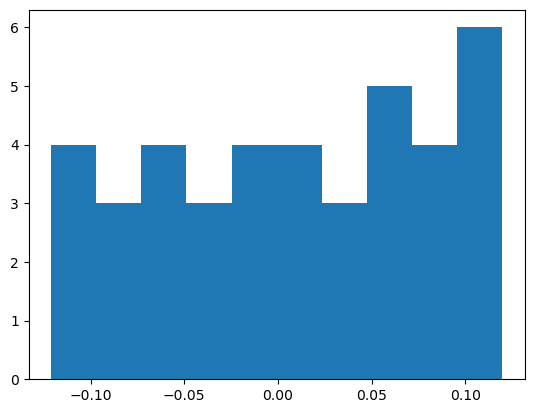

In [ ]:
plt.hist(lam,10)

In [ ]:
rxmax,rymax = 0.0,0.0
rxmin,rymin = 0.0,0.0
for i in range(N1*N2*Nd):
    n1,n2,alpha = index2site(i,N1,N2)
    r = n1*a1_dot+n2*a2_dot+D[alpha]
    if r[0] > rxmax:
        rxmax = r[0]
    if r[0] < rxmin:
        rxmin = r[0]
    if r[1] > rymax:
        rymax = r[1]
    if r[1] < rymin:
        rymin = r[1]
canvas = np.zeros((int(rxmax-rxmin)+1,int(rymax-rymin)+1))
for i in range(N1*N2*Nd*Norb):
    n1,n2,alpha = index2site(i,N1,N2)
    r = n1*a1_dot+n2*a2_dot+D[alpha%Nd]
    if r[2] == 0.0:
        #print(rxmin+r(0),rymin+r(1))
        canvas[int(r[0]-rxmin),int(r[1]-rymin)] += abs(V[i,15])

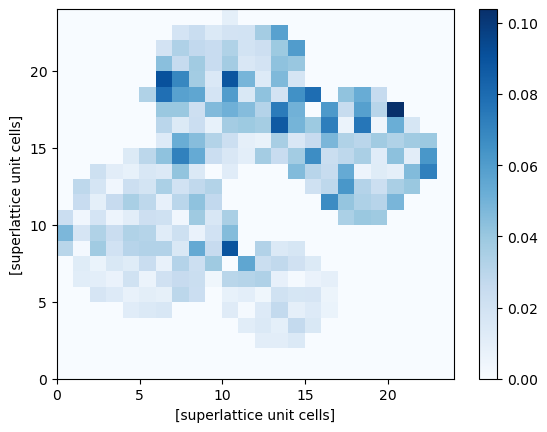

In [ ]:
plt.pcolor(canvas.T,cmap='Blues')
plt.colorbar()
plt.xlabel('[superlattice unit cells]')
plt.ylabel('[superlattice unit cells]');

In [ ]:
S.count_nonzero()

498608

In [ ]:
model = solid.sphere(0.0)
scale = 1  # Larger scale will use more facets. 
state = abs(V[:,0])/abs(V[:,0]).max()
for i,j in nnlist:
    n1,n2,alpha = index2site(i,N1,N2)
    r1 = n1*a1_dot+n2*a2_dot+D[alpha%Nd]
    n1p,n2p,alphap = index2site(j,N1,N2)
    r1p = n1p*a1_dot+n2p*a2_dot+D[alphap%Nd]
    iorb = alpha//Nd
    jorb = alphap//Nd
    if iorb == 0 and jorb == 0 and S[i,j] !=0:
        c = (112/256,128/256,144/256)  # Pb color: blueish-grey
        model = line3d(r1,r1p,model,c,scale)
model.save_as_scad()

'/Users/mlawler/Code/qdotarrays/solid_out.scad'